In [4]:
import numpy as np
from scipy.stats import ttest_rel

maxNF1 = np.load("postAnalysis/maxNF1.npy")
maxCF1 = np.load("postAnalysis/maxCF1.npy")
maxNF2 = np.load("postAnalysis/maxNF2.npy")
maxCF2 = np.load("postAnalysis/maxCF2.npy")
parametersPerParticipantNF1 = np.load("postAnalysis/funcParametersNF1.npy")
parametersPerParticipantCF1 = np.load("postAnalysis/funcParametersCF1.npy")
parametersPerParticipantNF2 = np.load("postAnalysis/funcParametersNF2.npy")
parametersPerParticipantCF2 = np.load("postAnalysis/funcParametersCF2.npy")

parametersPerParticipantNF1 = parametersPerParticipantNF1[1:,:]
parametersPerParticipantCF1 = parametersPerParticipantCF1[1:, :]
parametersPerParticipantNF2 = parametersPerParticipantNF2[1:, :]
parametersPerParticipantCF2 = parametersPerParticipantCF2[1:, :]

In [7]:
## Average learning curves

avgMaxNF1 = np.mean(maxNF1, axis=0)
avgMaxCF1 = np.mean(maxCF1, axis=0)
avgMaxNF2 = np.mean(maxNF2, axis=0)
avgMaxCF2 = np.mean(maxCF2, axis=0)

In [11]:
# t-test on initial value of CF1 and CF1

initialValueCF1 = parametersPerParticipantCF1[:, 0]
initialValueCF2 = parametersPerParticipantCF2[:, 0]
t_statistic, p_value = ttest_rel(initialValueCF1, initialValueCF2)
print(t_statistic)
print(p_value)



-0.10548629889013657
0.91709564606129


Text(0.5, 0.98, 'Maximum Deviation - Average of All Participants')

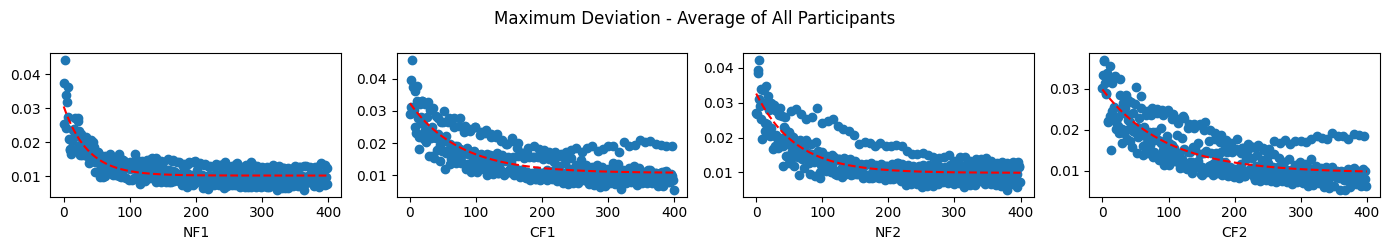

In [10]:
# PLOTTING MAX

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

initialGuess = [0.02, 0.01, 0.01]

plt.figure(figsize=(14, 2.5)).set_tight_layout(True)

plt.subplot(141)
plt.scatter(range(len(avgMaxNF1)), avgMaxNF1)
polyline = np.linspace(0, len(avgMaxNF1), len(avgMaxNF1))
opt_params, param_cov = curve_fit(monoExp, polyline, avgMaxNF1, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('NF1')

plt.subplot(142)
plt.scatter(range(len(avgMaxCF1)), avgMaxCF1)
polyline = np.linspace(0, len(avgMaxCF1), len(avgMaxCF1))
opt_params, param_cov = curve_fit(monoExp, polyline, avgMaxCF1, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('CF1')

plt.subplot(143)
plt.scatter(range(len(avgMaxNF2)), avgMaxNF2)
polyline = np.linspace(0, len(avgMaxNF2), len(avgMaxNF2))
opt_params, param_cov = curve_fit(monoExp, polyline, avgMaxNF2, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('NF2')

plt.subplot(144)
plt.scatter(range(len(avgMaxCF2)), avgMaxCF2)
polyline = np.linspace(0, len(avgMaxCF2), len(avgMaxCF2))
opt_params, param_cov = curve_fit(monoExp, polyline, avgMaxCF2, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "--", color="red")
plt.xlabel('CF2')

plt.suptitle("Maximum Deviation - Average of All Participants")